In [1]:
import sys, os
sys.path.insert(0, os.path.dirname(os.path.abspath('..')))

In [2]:
import yaml
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from stochastic_predictors.modules.experiment.metrics import *
from stochastic_predictors.modules.experiment.attacks import *
from stochastic_predictors.modules.model.cnn import StochasticCNN

In [4]:
experiment_n = "04"

In [5]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device('cpu')
print("Using device:", dev)

# load experiment configuration file
with open("../experiments/exp-s08/config-s08.yaml") as config:
    params = dict(yaml.load(config, Loader=yaml.FullLoader))

# load model
net = StochasticCNN(params["model"], params["n_for_features"], params["batch_norm"])
net.load_state_dict(torch.load("../experiments/exp-s08/stoch-08-statedict.pt"))

Using device: cuda


100%|██████████| 18/18 [00:00<00:00, 3772.23it/s]


<All keys matched successfully>

In [6]:
for data, target in test_loader:
    features = net.features(data)

NameError: name 'test_loader' is not defined

In [53]:
s = features.std(dim=0)
s.size()

torch.Size([10])

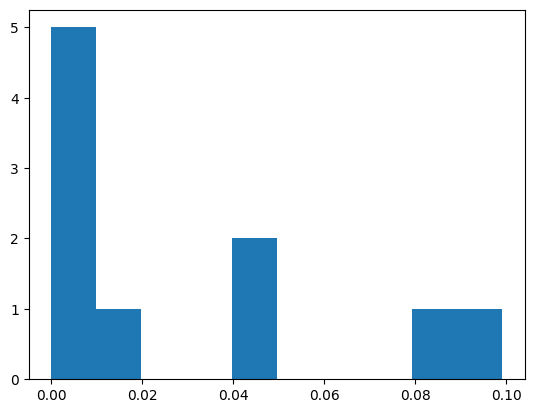

In [54]:
plt.hist(s.detach().numpy())
plt.show()

In [7]:
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [26]:
from torchattacks import FGSM, BIM

In [10]:
import torch.nn as nn

In [36]:
net.cpu()

StochasticCNN(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (4): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): Conv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (7): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (9): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (12): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): ReLU()
  (14): Conv2d(48, 48, kernel_size=(2, 2), stride=(2, 2))
  (15): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (16): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1))
  (17

In [34]:
for e in [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]:
    atk = BIM(net, eps=e)
    for data, target in test_loader:
        y = softmax(net.forward(atk(data, target)))
        pred = torch.argmax(y, dim=1)
        acc = (pred == target).sum() / target.size(0)
    print(e, acc)

1e-05 tensor(0.9005)
5e-05 tensor(0.9005)
0.0001 tensor(0.9005)
0.0005 tensor(0.9005)
0.001 tensor(0.9005)
0.005 tensor(0.8844)
0.01 tensor(0.8585)
0.05 tensor(0.7107)
0.1 tensor(0.5965)


In [25]:
for e in [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]:
    atk = FGSM(net, eps=e)
    for data, target in test_loader:
        y = softmax(net.forward(atk(data, target)))
        pred = torch.argmax(y, dim=1)
        acc = (pred == target).sum() / target.size(0)
    print(e, acc)

1e-05 tensor(0.2618)
5e-05 tensor(0.2612)
0.0001 tensor(0.2599)
0.0005 tensor(0.2590)
0.001 tensor(0.2543)
0.005 tensor(0.2399)
0.01 tensor(0.2181)
0.05 tensor(0.1039)
0.1 tensor(0.0579)


In [21]:
for p in [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]:
    d = nn.Dropout(p=p)
    for data, target in test_loader:
        y = softmax(net.forward(d(data)))
        pred = torch.argmax(y, dim=1)
        acc = (pred == target).sum() / target.size(0)
    print(p, acc)

0.001 tensor(0.1000)
0.005 tensor(0.0999)
0.01 tensor(0.1000)
0.02 tensor(0.1000)
0.05 tensor(0.1000)
0.1 tensor(0.0999)
0.2 tensor(0.1010)
0.5 tensor(0.1097)


## Baseline model

In [12]:
test_data = FashionMNIST("../data", train=False, transform=transforms.ToTensor())
test_loader = DataLoader(test_data, batch_size=10000, shuffle=True)

In [17]:
net.cpu()

StochasticCNN(
  (0): StochasticAdditiveConv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): StochasticAdditiveConv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): StochasticAdditiveConv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (5): StochasticAdditiveConv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (6): ReLU()
  (7): StochasticAdditiveConv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (8): ReLU()
  (9): StochasticAdditiveConv2d(48, 48, kernel_size=(2, 2), stride=(2, 2))
  (10): StochasticAdditiveConv2d(48, 96, kernel_size=(3, 3), stride=(1, 1))
  (11): ReLU()
  (12): StochasticAdditiveConv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (13): StochasticAdditiveConv2d(96, 50, kernel_size=(1, 1), stride=(1, 1))
  (14): ReLU()
  (15): StochasticAdditiveConv2d(50, 10, kernel_size=(1, 1), stride=(1, 1))
  (16): ReLU()
  (17): Flatten(start_dim=1, end_dim=-1)
)

In [13]:
softmax = nn.Softmax(dim=1)

In [90]:
for data, target in test_loader:
    y = softmax(net.forward(data))
    pred = torch.argmax(y, dim=1)
    y_pred, _ = torch.max(y, dim=1)
    y_corr, _ = torch.max(y[target == pred], dim=1)
    y_wrong, _ = torch.max(y[target != pred][:, pred], dim=1)

In [91]:
y = y_pred.detach().cpu()
y_corr = y_corr.detach().cpu()
y_wrong = y_wrong.detach().cpu()

In [92]:
y_corr = torch.round(y_corr * 10).numpy()

In [93]:
y_wrong = torch.round(y_wrong * 10).numpy()

In [94]:
np.unique(y_corr)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)

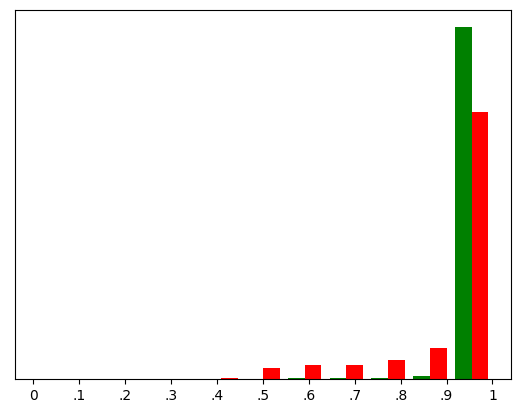

In [95]:
plt.hist([y_corr, y_wrong], bins=11, range=(0, 10), density=True, color=["green", "red"])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
           labels=['0', '.1', '.2', '.3', '.4', '.5', '.6', '.7', '.8', '.9', '1'])
plt.yticks([])
plt.show()

In [21]:
y_corr = torch.round(y_c * 10).numpy()

In [22]:
np.unique(y, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       dtype=float32),
 array([47986318,   849477,   559582,   403264,   357984,   327716,
          308656,   432315,   467470,   981647, 47325571]))

In [31]:
y_wrong = torch.round(y_worng * 10).flatten().numpy()

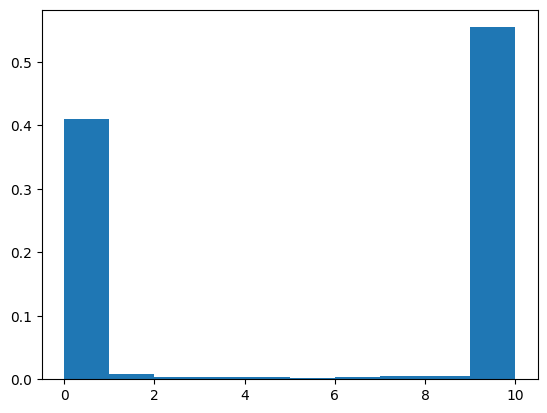

In [32]:
plt.hist(y_wrong, density=True)
plt.show()

In [ ]:
y_wrong = 

In [60]:
features.size()

torch.Size([10000, 50])

In [ ]:
plt.hist(features.detach().numpy(), bins=50)
plt.show()

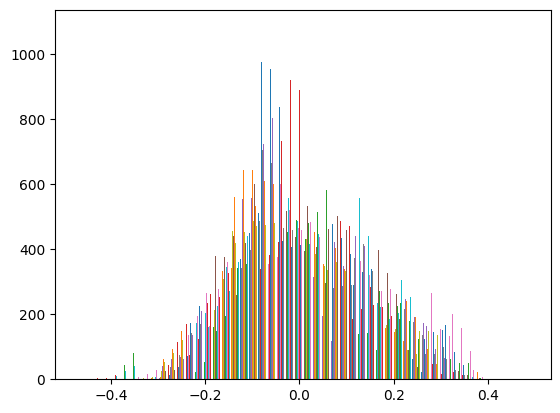

In [68]:
plt.hist(features.detach().numpy(), bins=50)
plt.show()

In [38]:
atk = FGSM(net, eps=0.001)

In [39]:
softmax = nn.Softmax(dim=1)
correct, total = 0, 0
for data, target in test_loader:
    data = atk(data, target).to(dev)
    out = softmax(net.forward(data))
    _, predicted = torch.max(out.data, 1)

    total += target.size(0)
    correct += (predicted.detach().cpu() == target).sum()
print(correct / total)

tensor(0.2312)


In [16]:
acc = attack(net, dev, transforms.ToTensor(), FGSM(net, eps=0.007))

TypeError: forward() missing 1 required positional argument: 'labels'

In [ ]:
print("Baseline model, robust accuracy on targeted attack:", acc.data)

In [ ]:
acc = attack(net, dev, transforms.ToTensor(), MissingFeaturesAttack(net, p=0.2))

In [ ]:
print("Baseline model, robust accuracy on missimg features:", acc.data)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
test_loader = DataLoader(test_data, batch_size=5000)

for i, (data, t_target) in enumerate(test_loader):
    data = data.to(dev)
    features = net.features(data)
    
features = features.cpu().detach().flatten(start_dim=1).numpy()

tsne = TSNE(n_components=2, random_state=0)
features_2d = tsne.fit_transform(features)

In [ ]:
plt.clf()

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'yellow', 'orange', 'purple']

for i in range(10):
    idx = np.where(t_target == i)[0]
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], color=colors[i], label=CLASSES[i])

plt.xlabel("x [units]")
plt.ylabel("y [units]")
plt.title("tSNE plot of features extracted by model")
plt.legend()

plt.show()

In [10]:
CLASSES = [
    "T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [11]:
softmax = torch.nn.Softmax(dim=1)

In [13]:
from torchattacks import FGSM, BIM

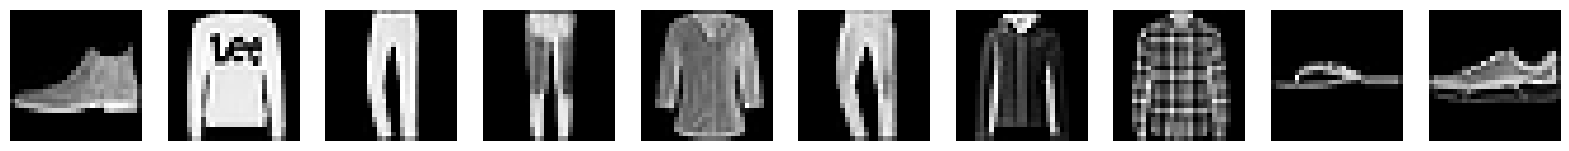

In [14]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    img, target = test_data[i]
    y = softmax(net.forward(img.unsqueeze(0).to(dev))).detach().cpu()
    pred = torch.argmax(y).item()
    ax.flat[i].imshow(img.permute(1, 2, 0), cmap="gray")
#     ax.flat[i].set_title(f"{CLASSES[pred]}: {y[:, pred].item():.2f}")
    ax.flat[i].axis("off")
plt.show()

In [15]:
data = list()
target = list()

for i in range(10):
    img, l = test_data[i]
    data.append(img.unsqueeze(0))
    target.append(l)
    
data = torch.cat(data, dim=0)
target = torch.Tensor(target).long()

In [17]:
atk = BIM(net, eps=0.05)
# atk.set_mode_default()

In [18]:
adv_data = atk(data, target)

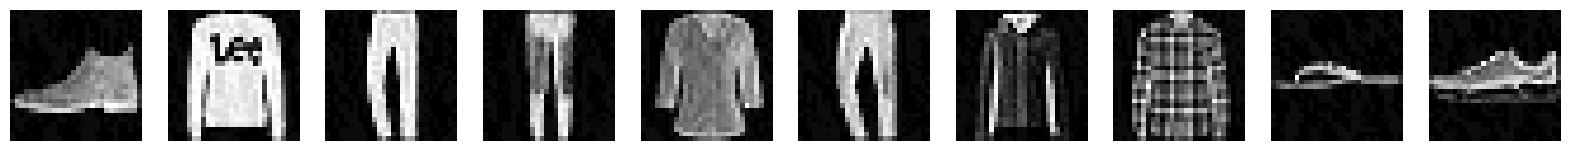

In [19]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    img = adv_data[i].detach().cpu()
    y = softmax(net.forward(img.unsqueeze(0).to(dev))).detach().cpu()
    pred = torch.argmax(y).item()
    ax[i].imshow(img.permute(1, 2, 0), cmap="gray")
#     ax[i].set_title(f"{CLASSES[pred]}: {y[:, pred].item():.2f}")
    ax[i].axis("off")
plt.show()

In [20]:
diff = abs(data - adv_data.detach().cpu())

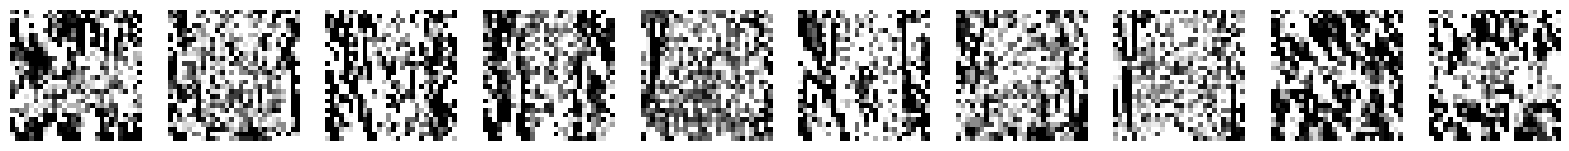

In [21]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    ax[i].imshow(diff[i].permute(1, 2, 0), vmin=0, vmax=0.05, cmap="gray")
    ax[i].axis("off")
plt.show()

In [ ]:
np.unique(diff.numpy())

In [ ]:
atk = FGSM(net, eps=0.01)

In [ ]:
adv_data = atk(data, target)

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    img = adv_data[i].detach().cpu()
    y = softmax(net.forward(img.unsqueeze(0).to(dev))).detach().cpu()
    pred = torch.argmax(y).item()
    ax[i].imshow(img.permute(1, 2, 0), cmap="gray")
    ax[i].set_title(f"{CLASSES[pred]}: {y[:, pred].item():.2f}")
    ax[i].axis("off")
plt.show()

In [ ]:
attack = FGSM(net, eps=0.001)

In [ ]:
attack.set_mode_default()

In [41]:
net

StochasticCNN(
  (0): StochasticAdditiveConv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): StochasticAdditiveConv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): StochasticAdditiveConv2d(12, 12, kernel_size=(2, 2), stride=(2, 2))
  (5): StochasticAdditiveConv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (6): ReLU()
  (7): StochasticAdditiveConv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (8): ReLU()
  (9): StochasticAdditiveConv2d(48, 48, kernel_size=(2, 2), stride=(2, 2))
  (10): StochasticAdditiveConv2d(48, 96, kernel_size=(3, 3), stride=(1, 1))
  (11): ReLU()
  (12): StochasticAdditiveConv2d(96, 96, kernel_size=(2, 2), stride=(2, 2))
  (13): StochasticAdditiveConv2d(96, 50, kernel_size=(1, 1), stride=(1, 1))
  (14): ReLU()
  (15): StochasticAdditiveConv2d(50, 10, kernel_size=(1, 1), stride=(1, 1))
  (16): ReLU()
  (17): Flatten(start_dim=1, end_dim=-1)
)

In [48]:
softmax = nn.Softmax(dim=1)
correct, total = 0, 0

for data, target in test_loader:
#     data = atk(data, target).to(dev)
    y = net.forward(data.to(dev))
    pred = torch.argmax(y, dim=1)

    total += target.size(0)
    correct += (pred.detach().cpu() == target).sum()
print(correct / total)

tensor(0.2351)
